In [1]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from color_util import *
from color_cluster import* 
from color_pop_util import *
from colour import hsl2rgb
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, deltaE_cie76,lab2rgb

dat=pd.read_csv("project_pop_color_hsl_200.csv")
#dat=pd.read_csv("project_pop_color_hsl_only_max_200.csv")
dat.drop(columns=["Unnamed: 0","Unnamed: 0.1"],inplace=True)
dat.fillna(value=0,inplace=True)
#dat

In [6]:
#for i in range(dat.shape[0]):
dat_rowmax=dat.copy()
rowmax=dat.drop(columns=['time','project_id']).idxmax(axis=1) 
#for i in range(dat.shape[0]):
#    for j in range(150):
#        if j!=rowmax[i]:
#            dat_rowmax.iloc[i][str(j)]=0

In [10]:
dat.sort_valueslues('time').tail()

,project_id,time,0,1,2,3,4,5,6,7,...,140,141,142,143,144,145,146,147,148,149
26059,26119901,2020/06/09,0.0,0.0,0.0,0.0,40.0,0.0,38.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9357,26121094,2020/06/09,87.0,777.0,469.0,57.0,0.0,2.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20269,26127785,2020/06/10,5.0,24.0,27.0,1.0,0.0,40.0,97.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7376,26126078,2020/06/10,39.0,250.0,67.0,306.0,526.0,67.0,180.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8313,26126339,2020/06/10,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#dat
hsl_cat=np.zeros((6,5,5))
hue=[[330,30],[30,90],[90,150],[150,210],[210,270],[270,330]]
satuation=[[0,20],[20,40],[40,60],[60,80],[80,100]]
lightness=[[0,20],[20,40],[40,60],[60,80],[80,100]]

hue_value=[0,60,120,180,240,300]
satuation_value=[10,30,50,70,90]
lightness_value=[10,30,50,70,90]

In [12]:
start=pd.to_datetime('2010/12')
end=pd.to_datetime('2020/06')
x=dat[pd.to_datetime(dat['time'])>start].copy()
x=x[pd.to_datetime(x['time'])<end]

In [14]:
x=x.sort_values('time')
x_day=x.groupby('time').sum()
x_day.drop(columns=["project_id"],inplace=True)
x_day.reset_index(inplace=True)
#x=x.fillna(value=0)

In [16]:
x_week=x_day.copy()
x_week['time']=pd.to_datetime(x_week['time']) - pd.to_timedelta(7, unit='d')
x_week = x_week.groupby(pd.Grouper(key='time', freq='W-MON')).sum().reset_index().sort_values('time')
x_week.tail()

,time,0,1,2,3,4,5,6,7,8,...,140,141,142,143,144,145,146,147,148,149
491,2020-04-27,9627.0,70868.0,44872.0,23448.0,4170.0,11491.0,49120.0,36337.0,21403.0,...,1021.0,9.0,0.0,2.0,22.0,109.0,0.0,0.0,0.0,4.0
492,2020-05-04,976.0,14447.0,29223.0,16046.0,3491.0,5908.0,30500.0,45004.0,13819.0,...,15.0,625.0,109.0,3467.0,638.0,7.0,26.0,0.0,91.0,221.0
493,2020-05-11,880.0,21152.0,56171.0,32422.0,3204.0,5340.0,35367.0,21704.0,15732.0,...,3.0,29.0,29.0,3.0,6.0,1.0,7.0,3.0,0.0,1.0
494,2020-05-18,2672.0,37261.0,45995.0,23945.0,4786.0,4204.0,24275.0,32827.0,19243.0,...,346.0,2032.0,4.0,222.0,284.0,66.0,18.0,0.0,52.0,113.0
495,2020-05-25,969.0,12500.0,26838.0,17816.0,7925.0,1939.0,18880.0,35918.0,21181.0,...,109.0,3214.0,1500.0,299.0,15.0,282.0,1266.0,0.0,43.0,1.0


In [17]:
x_week['tot']=x_week.iloc[:, 1:].sum(axis=1)


In [18]:
color_sort=(x_week.sum(axis=0).sort_values()[::-1])[1:]
#color_sort

In [19]:
def hsl_category_to_rgb():
    color_rgb=[]
    for i in range(150):
        i1,i2,i3=oneD_to_3D_index(i)
        color_hsl=np.asarray([hue_value[i1]/360.,satuation_value[i2]/100.,lightness_value[i3]/100.])
        color_rgb_i=np.asarray(hsl2rgb(color_hsl))
        color_rgb.append(color_rgb_i)
        
    return color_rgb
color_rgb=hsl_category_to_rgb()

In [348]:
#fig, ax = plt.subplots(figsize=(6,5))
#x_rolling=x_week.copy()

#ax.plot(pd.to_datetime(x_week['time']),x_week['0'].rolling(4).sum()/x_week['tot'].rolling(4).sum(),color=color_rgb[0])#c=colorcode['hexcode'][c])
#for c in range(1,150):
#    ax.plot(pd.to_datetime(x_week['time']),x_week[str(c)].rolling(4).sum()/x_week['tot'].rolling(4).sum(),color=color_rgb[c])

In [20]:
# monthly

x_month=x_week.copy()
x_month=x_month.groupby(pd.Grouper(key='time',freq='M')).sum().reset_index().sort_values('time')



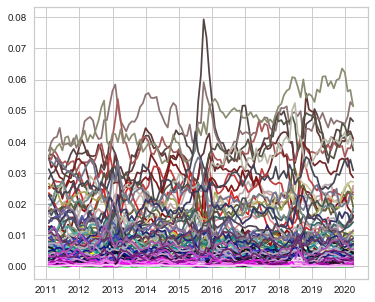

In [350]:
fig, ax = plt.subplots(figsize=(6,5))
#x_rolling=x_week.copy()

ax.plot(pd.to_datetime(x_month['time']),x_month['0'].rolling(4,center=True).mean()/x_month['tot'].rolling(4,center=True).mean(),color=color_rgb[0])#c=colorcode['hexcode'][c])
for c in range(1,150):
    ax.plot(pd.to_datetime(x_month['time']),x_month[str(c)].rolling(4,center=True).mean()/x_month['tot'].rolling(4,center=True).mean(),color=color_rgb[c])

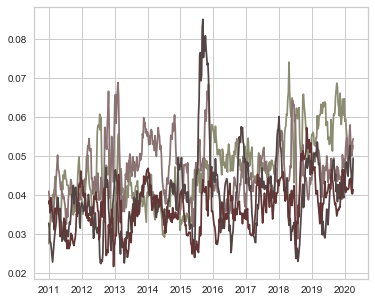

In [351]:
fig, ax = plt.subplots(figsize=(6,5))
#x_rolling=x_week.copy()
x_plot=x_week.copy()
ax.plot(pd.to_datetime(x_plot['time']),x_plot[color_sort.keys()[0]].rolling(8,center=True).mean()/x_plot['tot'].rolling(8,center=True).mean(),color=color_rgb[int(color_sort.keys()[0])])#c=colorcode['hexcode'][c])
for i in range(1,4):
    ax.plot(pd.to_datetime(x_plot['time']),x_plot[color_sort.keys()[i]].rolling(8,center=True).mean()/x_plot['tot'].rolling(8,center=True).mean(),color=color_rgb[int(color_sort.keys()[i])])

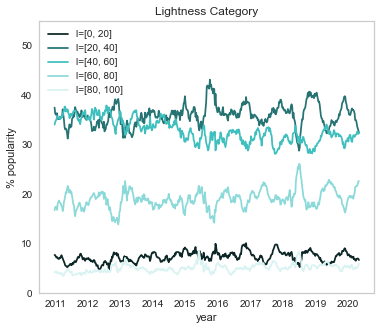

In [21]:
fig, ax = plt.subplots(figsize=(6,5))
for i in range(5):
    ax.plot(x_week['time'],
        100*marginal_cat(x_week,axis=2,cat=i)
        .rolling(8,center=True).mean()/x_week['tot']
        .rolling(8,center=True).mean(),
       color=hsl2rgb([0.5,0.5,lightness_value[i]/100.]),
           label='l='+str(lightness[i]))
ax.legend(loc='upper left')
ax.set_ylim([0,55])
ax.set_xlabel("year")
ax.set_ylabel('% popularity')
ax.set_title("Lightness Category")
ax.grid(False)

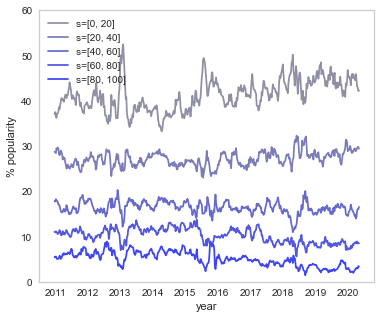

In [23]:
fig, ax = plt.subplots(figsize=(6,5))
for i in range(5):
    ax.plot(x_week['time'],
        100*marginal_cat(x_week,axis=1,cat=i)
        .rolling(8,center=True).mean()/x_week['tot']
        .rolling(8,center=True).mean(),
       color=hsl2rgb([0.66,lightness_value[i]/100.,0.6]),
            label='s='+str(satuation[i]))
ax.legend()
ax.set_ylim([0,60])
ax.set_xlabel("year")
ax.set_ylabel('% popularity')
ax.set_label('% popularity')
ax.grid(False)

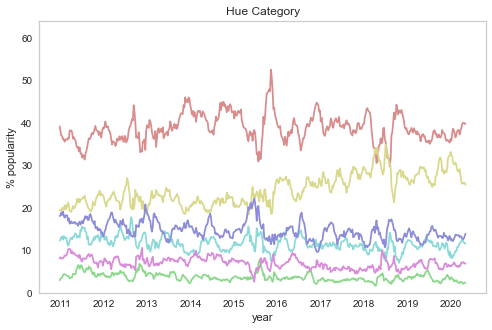

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
for i in range(6):
    ax.plot(x_week['time'],
        100*marginal_cat(x_week,axis=0,cat=i)
        .rolling(8,center=True).mean()/x_week['tot']
        .rolling(8,center=True).mean(),
       color=hsl2rgb([hue_value[i]/360.,0.5,0.7]))
ax.set_ylim([0,64])
ax.set_title("Hue Category")
ax.set_xlabel("year")
ax.set_ylabel('% popularity')
ax.grid(False)

In [71]:
#x_day
## project to 3 axis:

def marginal_index(axis=0,cat=0):
    hsl_cat=np.arange(150).reshape((6,5,5))
    if axis==0:
        index=hsl_cat[cat,:,:]
    if axis==1:
        index=hsl_cat[:,cat,:]
    if axis==2:
        index=hsl_cat[:,:,cat]
    return index.flatten()
marginal_i=marginal_index(axis=1,cat=2)
marginal_i

def marginal2D_index(s=0,l=0):
    hsl_cat=np.arange(150).reshape((6,5,5))

    index=hsl_cat[:,s,l]
 
    return index.flatten()


def marginal_cat(df,axis=0,cat=0):
    marginal_i=marginal_index(axis=axis,cat=cat)
    i_str=[str(i) for i in marginal_i]
    
    return df[i_str].sum(axis=1)

def marginal2D_cat(df,s=0,l=0):
    marginal_i=marginal2D_index(s=s,l=l)
    i_str=[str(i) for i in marginal_i]
    
    return df[i_str].sum(axis=1)
#test=marginal_cat(x_month,axis=0,cat=0)
#teste

In [5]:
marginal2D_index(s=0,l=2)

array([  2,  27,  52,  77, 102, 127])

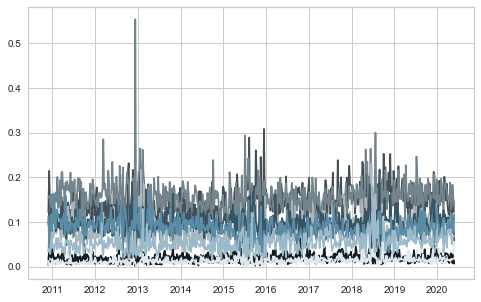

In [93]:
columns=(['s'+str(i)+'l'+str(j) for i in range(5) for j in range(5)])


fig, ax = plt.subplots(figsize=(8,5))

for i in columns[:10]:
    ax.plot(dat_marginal2D['time'],dat_marginal2D[i]/dat_marginal2D['tot'],
            color=hsl2rgb([200/360.,satuation_value[int(i[1])]/100.
                           ,lightness_value[int(i[3])]/100]))


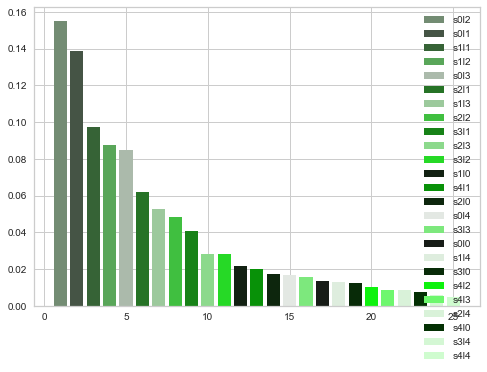

In [133]:
color_sort_2D=(dat_marginal2D.sum(axis=0).sort_values()[::-1])[1:]
for i in range(25):
    s=int(color_sort_2D.keys()[i][1])
    l=int(color_sort_2D.keys()[i][3])
    label=color_sort_2D.keys()[i]
    plt.bar([i+1],[color_sort_2D[i]/color_sort_2D.sum()],
            color=hsl2rgb([120/360.,satuation_value[s]/100.
                           ,lightness_value[l]/100]),label=label)
plt.legend()

In [356]:
#color_count=dat[dat['project_id']==4612394].iloc[0][2:]
#color_order=np.argsort(color_count)[::-1]

#for i in range(12):
#    plt.bar([i+1],[color_count[color_order[i]]],color=color_rgb[color_order[i]])
#plt.xlabel("popularity ranking",fontsize=15)
#plt.ylabel("number of pixels",fontsize=15)
#plt.grid("false")


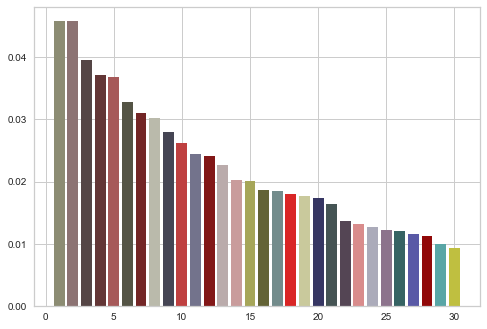

In [26]:
for i in range(30):
    plt.bar([i+1],[color_sort[i]/color_sort.sum()],color=color_rgb[int(color_sort.keys()[i])])
#color_sort.keys()

In [36]:
#oneD_to_3D_index(8)
x_week['time']

0     2010-11-29
1     2010-12-06
2     2010-12-13
3     2010-12-20
4     2010-12-27
         ...    
491   2020-04-27
492   2020-05-04
493   2020-05-11
494   2020-05-18
495   2020-05-25
Name: time, Length: 496, dtype: datetime64[ns]

In [63]:
columns=['time']
columns.extend(['h'+str(i) for i in range(6)])
columns.extend(['s'+str(i) for i in range(5)])
columns.extend(['l'+str(i) for i in range(5)])
columns.append('tot')
dat_marginal=pd.DataFrame(columns=columns)
dat_marginal['time']=x_week['time']
dat_marginal['tot']=x_week['tot']
#for idex,row in x_week.iterrows():
#    element={}
#    element['time']=row['time']
    
for i in range(5):
    dat_marginal['h'+str(i)]=marginal_cat(x_week,axis=0,cat=i)
    dat_marginal['s'+str(i)]=marginal_cat(x_week,axis=1,cat=i)
    dat_marginal['l'+str(i)]=marginal_cat(x_week,axis=1,cat=i)
dat_marginal['h5']=marginal_cat(x_week,axis=0,cat=5)
    
   

In [65]:
dat_marginal[dat_marginal['time']==pd.to_datetime('2020-05-25')]

,time,h0,h1,h2,h3,h4,h5,s0,s1,s2,s3,s4,l0,l1,l2,l3,l4,tot
495,2020-05-25,240370.0,133385.0,6851.0,37371.0,80718.0,29775.0,232233.0,140510.0,93220.0,48452.0,14055.0,232233.0,140510.0,93220.0,48452.0,14055.0,528470.0


In [30]:
dat_marginal_month=dat_marginal.groupby(pd.Grouper(key='time',freq='M')).sum().reset_index().sort_values('time')
dat_marginal_month.head()

,time,h0,h1,h2,h3,h4,h5,s0,s1,s2,s3,s4,l0,l1,l2,l3,l4,tot
0,2010-11-30,274261.0,82465.0,11318.0,81405.0,108208.0,19591.0,182657.0,152394.0,112856.0,83424.0,45917.0,182657.0,152394.0,112856.0,83424.0,45917.0,577248.0
1,2010-12-31,1320842.0,711754.0,81417.0,358904.0,708421.0,275223.0,1354771.0,919755.0,588283.0,391598.0,202154.0,1354771.0,919755.0,588283.0,391598.0,202154.0,3456561.0
2,2011-01-31,1775625.0,926829.0,199559.0,726455.0,890052.0,406352.0,1785897.0,1438949.0,901175.0,541425.0,257426.0,1785897.0,1438949.0,901175.0,541425.0,257426.0,4924872.0
3,2011-02-28,1436516.0,877117.0,185389.0,456796.0,691503.0,404594.0,1599355.0,1205292.0,623463.0,420131.0,203674.0,1599355.0,1205292.0,623463.0,420131.0,203674.0,4051915.0
4,2011-03-31,1244214.0,682934.0,107682.0,358595.0,555070.0,344487.0,1327320.0,922257.0,525290.0,350230.0,167885.0,1327320.0,922257.0,525290.0,350230.0,167885.0,3292982.0


In [81]:
dat_rf=pd.read_csv("color_feature_hsl/color_weekly_feature_to_month_h0.csv")
time=dat_rf['month']

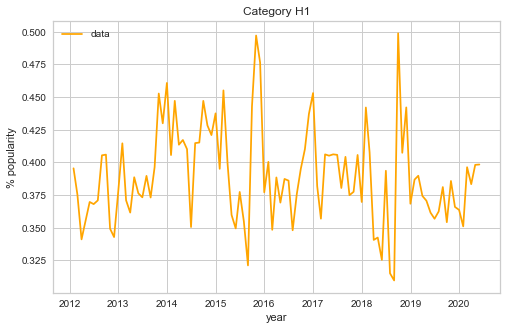

In [82]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')


fig, ax = plt.subplots(figsize=(8,5))
ax.plot(pd.to_datetime(time),dat_rf['y'],color='orange',label='data')
ax.set_title("Category "+'h1'.upper())
ax.set_xlabel('year')
ax.set_ylabel('% popularity')
ax.legend(loc="upper left")
#ax.xaxis.set_major_locator(years)
#ax.xaxis.set_major_formatter(years_fmt)
#ax.xaxis.set_minor_locator(months)

#datemin = np.datetime64(time.iloc[0], 'Y')
#datemax = np.datetime64(time.iloc[-1], 'Y') + np.timedelta64(1, 'Y')
#ax.set_xlim(datemin, datemax)

In [76]:
columns=['time']
columns.extend(['s'+str(i)+'l'+str(j) for i in range(5) for j in range(5)])

columns.append('tot')
dat_marginal2D=pd.DataFrame(columns=columns)
dat_marginal2D['time']=x_week['time']
dat_marginal2D['tot']=x_week['tot']
#for idex,row in x_week.iterrows():
#    element={}
#    element['time']=row['time']
    
for i in range(5):
    for j in range(5):
        dat_marginal2D['s'+str(i)+'l'+str(j)]=marginal2D_cat(x_week,s=i,l=j)
 

dat_marginal2D_month=dat_marginal2D.groupby(pd.Grouper(key='time',freq='M')).sum().reset_index().sort_values('time')
dat_marginal_month.head()

,time,h0,h1,h2,h3,h4,h5,s0,s1,s2,s3,s4,l0,l1,l2,l3,l4,tot
0,2010-11-30,274261.0,82465.0,11318.0,81405.0,108208.0,19591.0,182657.0,152394.0,112856.0,83424.0,45917.0,182657.0,152394.0,112856.0,83424.0,45917.0,577248.0
1,2010-12-31,1320842.0,711754.0,81417.0,358904.0,708421.0,275223.0,1354771.0,919755.0,588283.0,391598.0,202154.0,1354771.0,919755.0,588283.0,391598.0,202154.0,3456561.0
2,2011-01-31,1775625.0,926829.0,199559.0,726455.0,890052.0,406352.0,1785897.0,1438949.0,901175.0,541425.0,257426.0,1785897.0,1438949.0,901175.0,541425.0,257426.0,4924872.0
3,2011-02-28,1436516.0,877117.0,185389.0,456796.0,691503.0,404594.0,1599355.0,1205292.0,623463.0,420131.0,203674.0,1599355.0,1205292.0,623463.0,420131.0,203674.0,4051915.0
4,2011-03-31,1244214.0,682934.0,107682.0,358595.0,555070.0,344487.0,1327320.0,922257.0,525290.0,350230.0,167885.0,1327320.0,922257.0,525290.0,350230.0,167885.0,3292982.0


In [78]:
dat_marginal2D_month.tail()

,time,s0l0,s0l1,s0l2,s0l3,s0l4,s1l0,s1l1,s1l2,s1l3,...,s3l1,s3l2,s3l3,s3l4,s4l0,s4l1,s4l2,s4l3,s4l4,tot
110,2020-01-31,48081.0,459936.0,447179.0,278072.0,87145.0,59998.0,299569.0,244004.0,189373.0,...,105399.0,60404.0,36777.0,11447.0,14948.0,42927.0,16252.0,9931.0,6248.0,2980595.0
111,2020-02-29,47488.0,504104.0,537987.0,262958.0,51085.0,76342.0,349669.0,311493.0,206191.0,...,102806.0,42528.0,39590.0,16926.0,15826.0,17844.0,2038.0,8791.0,6992.0,3297690.0
112,2020-03-31,67384.0,736127.0,753550.0,443178.0,76209.0,112373.0,469805.0,313171.0,270640.0,...,143817.0,125158.0,53033.0,22310.0,17524.0,49596.0,11448.0,23455.0,13848.0,4366509.0
113,2020-04-30,59212.0,610677.0,649395.0,393395.0,84699.0,92079.0,381708.0,381348.0,326308.0,...,137574.0,85916.0,52116.0,24602.0,26720.0,50272.0,27123.0,18809.0,14495.0,4144516.0
114,2020-05-31,30229.0,310324.0,422656.0,286295.0,85924.0,52644.0,249907.0,276981.0,172654.0,...,97240.0,39179.0,64466.0,15527.0,20580.0,35613.0,15465.0,14705.0,9962.0,2801118.0


In [80]:
#from color_weekly_make_feature_hsl import *

#dat_h0=get_dataframe_for_model(dat_marginal,dat_marginal_month,column='h0')
print(dat_marginal2D.shape)
dat_marginal2D.to_csv("pop_color_hsl_marginal2D_weekly.csv")
print(dat_marginal2D.shape)
dat_marginal2D_month.to_csv("pop_color_hsl_marginal2D_monthly.csv")

(496, 27)
(496, 27)


In [67]:
dat_marginal['time']

dat_marginal[dat_marginal['time']==pd.to_datetime('2020-05-25')]

,time,h0,h1,h2,h3,h4,h5,s0,s1,s2,s3,s4,l0,l1,l2,l3,l4,tot
495,2020-05-25,240370.0,133385.0,6851.0,37371.0,80718.0,29775.0,232233.0,140510.0,93220.0,48452.0,14055.0,232233.0,140510.0,93220.0,48452.0,14055.0,528470.0


In [26]:
x_day.index=pd.to_datetime(x_day.index)

In [206]:
color_time_136['tot']=color_time_136.iloc[:, 1:].sum(axis=1)

In [273]:
y=x_week[41]/x_week['tot']

In [409]:
#y.rolling(4).mean()
#y

In [374]:
def get_importance(x,y,year=2014,random_state=0,n_estimators=100):   
    
    
    X_train, X_valid, y_train, y_valid = train_test_split(x, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=random_state)

    model = RandomForestRegressor(n_estimators=n_estimators,min_samples_leaf=2, random_state=random_state)
    model.fit(X_train, y_train)
    
    preds = model.predict(X_valid)
    r2 = r2_score(y_valid, preds)
    
    print('R2 score:', r2)

    
    #importance=pd.DataFrame(data= {'importance':model.feature_importances_}, index=col_x)
    return r2#importance,r2


In [663]:
#dat_rf=pd.read_csv("color_weekly_feature_to_month_41.csv")

random_state=1
n_estimators=11
#X_train, X_valid, y_train, y_valid = train_test_split(x.drop(columns='month'), y, 
#                                                            train_size=0.8, test_size=0.2,
#                                                            random_state=random_state)


xx=x.drop(columns='month')
xx[xx.columns[:8]]=np.log(xx[xx.columns[:8]])+20
X_train=xx.iloc[:77]
y_train=np.log(y.iloc[:77])+20
X_valid=xx.iloc[80:]
y_valid=np.log(y.iloc[80:])+20

model = RandomForestRegressor(n_estimators=n_estimators,min_samples_leaf=2, random_state=random_state)
model.fit(X_train, y_train)

preds = model.predict(X_valid)
r2 = r2_score(y_valid, preds)

print('R2 score:', r2)
#preds = model.predict(X_train)
#r2 = r2_score(y_train, preds)
r2

R2 score: 0.22068645482599825


0.22068645482599825

In [667]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})
forecast_accuracy(preds,y_valid)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


{'mape': 0.005890881440328979,
 'me': -0.008691666422853258,
 'mae': 0.10638637868474507,
 'mpe': -0.00042584127419437575,
 'rmse': 0.13082967567681725,
 'acf1': 0.9213111426100234,
 'corr': 0.49489983307691493,
 'minmax': 0.005867825337960375}

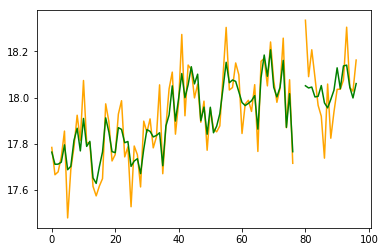

In [666]:
preds_train = model.predict(X_train)
#r2 = r2_score(y_train, preds)

plt.plot(range(77),y_train,color='orange')
plt.plot(range(77),preds_train,color='g')
plt.plot(range(80,97),y_valid,color='orange')
plt.plot(range(80,97),preds,color='g')

In [670]:
rank.to_csv('color_rank_136.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [555]:
dat_rf=pd.read_csv("color_weekly_feature_to_month_41.csv")

In [557]:
#dat_rf
#yy=pd.read_csv("pro_color_time_for_ts.csv")#dat_rf['y']

In [567]:
x=dat_rf.drop(columns=['Unnamed: 0','index','y']).copy()
y=dat_rf['y'].copy()

In [574]:
x['year']=x['month'].apply(lambda x: int(x[:4])

In [578]:
x['m']=x['month'].apply(lambda x: int(x[-2:]))

In [16]:
hsl_cat=np.arange(150).reshape((6,5,5))
hsl_cat[1]

array([[25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49]])

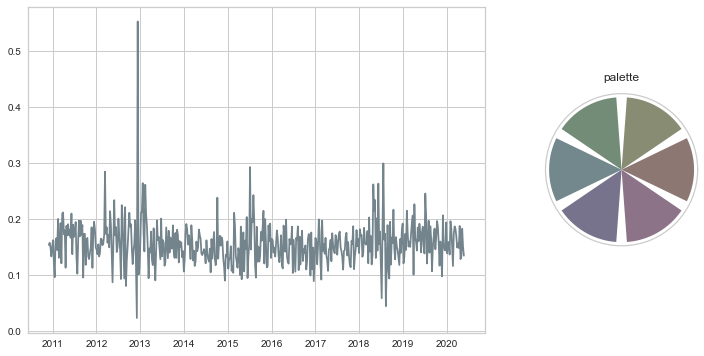

In [159]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
xval = np.arange(360)
yval = np.ones_like(xval)

colormap = plt.get_cmap('hsv')
norm = mpl.colors.Normalize(0.0, 2*np.pi)


fig = plt.figure(figsize=(12, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax1 = plt.subplot(gs[1], polar=True)


#ax0 = plt.subplot(1, 2, 1, polar=True)

for h in hue_value:
    ax1.bar([(h)*np.pi/180], [1],
           color=hsl2rgb([(h+10)/360,0.1,0.5]),width=0.9,bottom=0.5)
ax1.set_yticks([])
ax1.set_xticks([])
ax1.set_title('palette')
i="s0l2"

ax0 = plt.subplot(gs[0])
#ax = plt.subplot(1, 2, 2,size=(8,5))
ax0.plot(dat_marginal2D['time'],dat_marginal2D[i]/dat_marginal2D['tot'],
            color=hsl2rgb([200/360.,satuation_value[int(i[1])]/100.
                           ,lightness_value[int(i[3])]/100]))

In [115]:
hsl2rgb?

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mpl

fig = plt.figure()

display_axes = fig.add_axes([0.1,0.1,0.8,0.8], projection='polar')
display_axes._direction = 2*np.pi ## This is a nasty hack - using the hidden field to 
                                  ## multiply the values such that 1 become 2*pi
                                  ## this field is supposed to take values 1 or -1 only!!

norm = mpl.colors.Normalize(0.0, 2*np.pi)

# Plot the colorbar onto the polar axis
# note - use orientation horizontal so that the gradient goes around
# the wheel rather than centre out
quant_steps = 2056
cb = mpl.colorbar.ColorbarBase(display_axes, cmap=cm.get_cmap('hsl',quant_steps),
                                   norm=norm,
                                   orientation='horizontal')

# aesthetics - get rid of border and axis labels                                   
cb.outline.set_visible(False)                                 
display_axes.set_axis_off()
display_axes.set_rlim([-1,1])
plt.show() # Replace with plt.savefig if you want to save a file

ValueError: 'hsl' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

AttributeError: 'float' object has no attribute 'get_matrix'

<Figure size 576x396 with 1 Axes>

In [186]:

def rgb2hex(rgb):
    
    print(rgb)
    rgb=tuple(rgb)
    return '#'+('%02x%02x%02x' % rgb)

def rgb2hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(rgb[0],rgb[1],rgb[2])

hexcode=[]
for h in hue_value:
    color=np.asarray((hsl2rgb([(h+10)/360,0.1,0.3])))
    color=color*255
    color=color.astype('int')
    print(color)
    hexcode.append(rgb2hex(color))

[84 71 68]
[81 84 68]
[68 84 71]
[68 81 84]
[71 68 84]
[84 68 81]


In [172]:
hsl2rgb([(h+10)/360,0.1,0.3])

(0.33, 0.26999999999999996, 0.31999999999999995)

In [187]:
hexcode

['#544744', '#515444', '#445447', '#445154', '#474454', '#544451']

In [184]:
def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)